# Jyllands Posten

In [108]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import time
import pandas as pd
from afinn import Afinn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Mette 

In [70]:
# Set the countdown for how many times we want the loop to run.
# Gives also a approximately number for how many article that is found 
# Set after a estimate of how many article after inspecting the page before to see how many there are.
# 10 new ones appear each time the button is clicked!
countdown=35

#Starts the timer:
start_time = time.time()

# Starts the webdriver and logs into the homepage:
url = 'https://jyllands-posten.dk/arkiv/?q=%22Mette+Frederiksen%22&from=Fra+dato&to=Til+dato&fps=7&hs=200' # This one is changed after what person we are looking for.
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
#### Remember to click "Accepter" on the cookie-thing #### (Otherwise we get the error: "ElementNotInteractableException: Message: element not interactable")
# If "ElementClickInterceptedException: Message: element click intercepted: Element <div class="mereBtn">...<" occurs then close other windows that the webdriver has opened and try to run the scrip again.

# and we wait a little to make sure the hompage is ready:
time.sleep(3)

# Defines lenOfPage for futher use:
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

# Makes a while loop over the fuctions of the page:
while(match==False): 
    lenOfPage # Makes the page go down.
    time.sleep(2) # Here we sleep agian so the page can go down to the button.
    driver.find_element_by_class_name("mereBtn").click() # makes the spript click the button: "Se flere" 
    time.sleep(10) # VIP sleep! Due to lag the button: "Se flere" can use some time to activate correctly.
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;") # Makes the page go down.
    countdown -= 1 # Our countdown goes down with 1.
    if countdown < 1: # And when our countdown is less that 1 our loop ends.
        match=True
                                                   
time.sleep(3) # Makes the loop sleep 

soup = BeautifulSoup(driver.page_source, 'lxml') # Make the BeautifulSoup to just soup in the futher use 

print("--- %s seconds ---" % round((time.time() - start_time),2))
 
# Find the different element in the html text in the soup:
date_html = (soup.find_all('span', {'class': 'artDateTime'}))
text_html = (soup.find_all('div', {'class': 'artDesc'}))

# Makes the html over to text:
text_mette = [e.get_text() for e in text_html]
date_mette = [e.get_text() for e in date_html]

# Makes the dataframe with date and text:              
mette_jyllans_posten_df = pd.DataFrame({'date':date_mette, 
                   'text':text_mette })
print(mette_jyllans_posten_df) #Print the dataframe to make sure that there is data in it.

# Save the dataframe into a .csv file for futher research:
mette_jyllans_posten_df.to_csv('mette_jyllands_posten_df.csv', encoding='utf-8-sig') 
# # # Remember that this wille overwrite a already existing fil in that name # # #

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147
[WDM] - Driver [C:\Users\birgi_000\.wdm\drivers\chromedriver\win32\84.0.4147.30\chromedriver.exe] found in cache


 
--- 443.35 seconds ---
           date                                               text
0    28.08.2020  ). Dernæst blev han formand for Dansk Ungdoms ...
1    28.08.2020   til et statsautoriseret sortsyn. Bundsgaard h...
2    28.08.2020  Umiddelbart lyder det voldsomt, når statsminis...
3    28.08.2020  Statsminister Mette Frederiksen (S) har fundet...
4    28.08.2020  Mette Frederiksens Statsministerium vil den ko...
..          ...                                                ...
355  15.06.2020   udkommer Danmarks Statistik udsender arbejdst...
356  15.06.2020  , der havde rådet Mette Frederiksen til at luk...
357  15.06.2020   år siden fik Danmark overdraget Sønderjylland...
358  15.06.2020  , men vi venter med festen til om et år, siger...
359  15.06.2020  , eller når der opstår ballade. Det virker,« s...

[360 rows x 2 columns]


In [93]:
# Load the data frame
mette_df = pd.read_csv('mette_jyllands_posten_df.csv', sep=',')

# Fixs the strings:
mette_df['date'] = mette_df['date'].str[-13:]

mette_df = mette_df.reset_index().drop('index', axis=1)\
                               .drop('Unnamed: 0', axis=1)

#The Afinn sentiment analysis does not differentiate between lower and upper case letters
#I have used to inputs, langauge to Danish and emojies, so it understands symbols like ":)"
afinn = Afinn(language='da', emoticons=True)

#This is run on the entire list of tweets and adds a new column with the values
mette_df['afinn'] = [afinn.score(text) for text in mette_df.text]

print(mette_df['afinn'].sum())
mette_df

70.0


,date,text,afinn
0,28.08.2020,). Dernæst blev han formand for Dansk Ungdoms ...,2.0
1,28.08.2020,til et statsautoriseret sortsyn. Bundsgaard h...,3.0
2,28.08.2020,"Umiddelbart lyder det voldsomt, når statsminis...",1.0
3,28.08.2020,Statsminister Mette Frederiksen (S) har fundet...,2.0
4,28.08.2020,Mette Frederiksens Statsministerium vil den ko...,0.0
...,...,...,...
355,15.06.2020,udkommer Danmarks Statistik udsender arbejdst...,0.0
356,15.06.2020,", der havde rådet Mette Frederiksen til at luk...",-2.0
357,15.06.2020,år siden fik Danmark overdraget Sønderjylland...,2.0
358,15.06.2020,", men vi venter med festen til om et år, siger...",-1.0


Søren

In [72]:
# Set the countdown for how many times we want the loop to run.
# Gives also a approximately number for how many article that is found 
# Set after a estimate of how many article after inspecting the page before to see how many there are.
# 10 new ones appear each time the button is clicked!
countdown=35

#Starts the timer:
start_time = time.time()

# Starts the webdriver and logs into the homepage:
url = 'https://jyllands-posten.dk/arkiv/?q=%22S%C3%B8ren+brostr%C3%B8m%22&from=Fra+dato&to=Til+dato&fps=7&hs=200' # This one is changed after what person we are looking for.
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
#### Remember to click "Accepter" on the cookie-thing #### (Otherwise we get the error: "ElementNotInteractableException: Message: element not interactable")
# If "ElementClickInterceptedException: Message: element click intercepted: Element <div class="mereBtn">...<" occurs then close other windows that the webdriver has opened and try to run the scrip again.

# and we wait a little to make sure the hompage is ready:
time.sleep(3)

# Defines lenOfPage for futher use:
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

# Makes a while loop over the fuctions of the page:
while(match==False): 
    lenOfPage # Makes the page go down.
    time.sleep(2) # Here we sleep agian so the page can go down to the button.
    driver.find_element_by_class_name("mereBtn").click() # makes the spript click the button: "Se flere" 
    time.sleep(10) # VIP sleep! Due to lag the button: "Se flere" can use some time to activate correctly.
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;") # Makes the page go down.
    countdown -= 1 # Our countdown goes down with 1.
    if countdown < 1: # And when our countdown is less that 1 our loop ends.
        match=True
                                                   
time.sleep(3) # Makes the loop sleep 

soup = BeautifulSoup(driver.page_source, 'lxml') # Make the BeautifulSoup to just soup in the futher use 

print("--- %s seconds ---" % round((time.time() - start_time),2))
 
# Find the different element in the html text in the soup:
date_htlm = (soup.find_all('span', {'class': 'artDateTime'}))
text_html = (soup.find_all('div', {'class': 'artDesc'}))

# Makes the html over to text:
text_soren = [e.get_text() for e in text_html]
date_soren = [e.get_text() for e in date_htlm]

# Makes the dataframe with date and text:              
soren_jyllans_posten_df = pd.DataFrame({'date':date_soren, 
                   'text':text_soren})
print(soren_jyllans_posten_df) #Print the dataframe to make sure that there is data in it.

# Save the dataframe into a .csv file for futher research:
soren_jyllans_posten_df.to_csv('soren_jyllands_posten_df.csv', encoding='utf-8-sig') 
# # # Remember that this wille overwrite a already existing fil in that name # # #

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147
[WDM] - Driver [C:\Users\birgi_000\.wdm\drivers\chromedriver\win32\84.0.4147.30\chromedriver.exe] found in cache


 
--- 436.81 seconds ---
           date                                               text
0    22.08.2020   efter Sundhedsstyrelsens anbefalinger havde d...
1    18.08.2020   af stofmundbind, der »er bedre end intet mund...
2    16.08.2020   med coronaen«, som statsminister Mette Freder...
3    16.08.2020  , er vores politikere nødt til at blive skarpe...
4    15.08.2020  Direktøren for Sundhedsstyrelsen, Søren Brostr...
..          ...                                                ...
355  28.01.2014  . - Hvis lægeambulancen kommer frem til et stø...
356  09.12.2013   til sin anmodning (), så den kunne blive bedr...
357  09.09.2013   a third of the 400 women who contract it ever...
358  04.08.2013  , for når hverdagen kører, og folk har travlt,...
359  18.05.2013   man roligt tage af sted. Der er ikke nogen re...

[360 rows x 2 columns]


In [92]:
# Load the data frame
soren_df = pd.read_csv('soren_jyllands_posten_df.csv', sep=',')

# Fixs the strings:
soren_df['date'] = soren_df['date'].str[-13:]

soren_df = soren_df.reset_index().drop('index', axis=1)\
                               .drop('Unnamed: 0', axis=1)

#The Afinn sentiment analysis does not differentiate between lower and upper case letters
#I have used to inputs, langauge to Danish and emojies, so it understands symbols like ":)"
afinn = Afinn(language='da', emoticons=True)

#This is run on the entire list of tweets and adds a new column with the values
soren_df['afinn'] = [afinn.score(text) for text in soren_df.text]

print(soren_df['afinn'].sum())
soren_df

-21.0


,date,text,afinn
0,22.08.2020,efter Sundhedsstyrelsens anbefalinger havde d...,5.0
1,18.08.2020,"af stofmundbind, der »er bedre end intet mund...",1.0
2,16.08.2020,"med coronaen«, som statsminister Mette Freder...",2.0
3,16.08.2020,", er vores politikere nødt til at blive skarpe...",5.0
4,15.08.2020,"Direktøren for Sundhedsstyrelsen, Søren Brostr...",2.0
...,...,...,...
355,28.01.2014,. - Hvis lægeambulancen kommer frem til et stø...,0.0
356,09.12.2013,"til sin anmodning (), så den kunne blive bedr...",0.0
357,09.09.2013,a third of the 400 women who contract it ever...,0.0
358,04.08.2013,", for når hverdagen kører, og folk har travlt,...",3.0


Kåre

In [74]:
# Set the countdown for how many times we want the loop to run.
# Gives also a approximately number for how many article that is found 
# Set after a estimate of how many article after inspecting the page before to see how many there are.
# 10 new ones appear each time the button is clicked!
countdown=35

#Starts the timer:
start_time = time.time()

# Starts the webdriver and logs into the homepage:
url = 'https://jyllands-posten.dk/arkiv/?q=%22k%C3%A5re+m%C3%B8lbak%22&from=Fra+dato&to=Til+dato&fps=7&hs=200' # This one is changed after what person we are looking for.
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
#### Remember to click "Accepter" on the cookie-thing #### (Otherwise we get the error: "ElementNotInteractableException: Message: element not interactable")
# If "ElementClickInterceptedException: Message: element click intercepted: Element <div class="mereBtn">...<" occurs then close other windows that the webdriver has opened and try to run the scrip again.

# and we wait a little to make sure the hompage is ready:
time.sleep(3)

# Defines lenOfPage for futher use:
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

# Makes a while loop over the fuctions of the page:
while(match==False): 
    lenOfPage # Makes the page go down.
    time.sleep(2) # Here we sleep agian so the page can go down to the button.
    driver.find_element_by_class_name("mereBtn").click() # makes the spript click the button: "Se flere" 
    time.sleep(10) # VIP sleep! Due to lag the button: "Se flere" can use some time to activate correctly.
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;") # Makes the page go down.
    countdown -= 1 # Our countdown goes down with 1.
    if countdown < 1: # And when our countdown is less that 1 our loop ends.
        match=True
                                                   
time.sleep(3) # Makes the loop sleep 

soup = BeautifulSoup(driver.page_source, 'lxml') # Make the BeautifulSoup to just soup in the futher use 

print("--- %s seconds ---" % round((time.time() - start_time),2))
 
# Find the different element in the html text in the soup:
date_html = (soup.find_all('span', {'class': 'artDateTime'}))
text_html = (soup.find_all('div', {'class': 'artDesc'}))

# Makes the html over to text:
text_kaare = [e.get_text() for e in text_html]
date_kaare = [e.get_text() for e in date_html]

# Makes the dataframe with date and text:              
kaare_jyllans_posten_df = pd.DataFrame({'date':date_kaare, 
                   'text':text_kaare})
print(kaare_jyllans_posten_df) #Print the dataframe to make sure that there is data in it.

# Save the dataframe into a .csv file for futher research:
kaare_jyllans_posten_df.to_csv('kaare_jyllands_posten_df.csv', encoding='utf-8-sig') 
# # # Remember that this wille overwrite a already existing fil in that name # # #

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147
[WDM] - Driver [C:\Users\birgi_000\.wdm\drivers\chromedriver\win32\84.0.4147.30\chromedriver.exe] found in cache


 
--- 443.85 seconds ---
           date                                               text
0    17.08.2020   i blandt andet Libyen for grove overgreb, sig...
1    16.08.2020  Statens Serum Instituts direktør, Kåre Mølbak,...
2    14.08.2020  .00 i Spejlsalen i Statsministeriet. pressemød...
3    13.08.2020  E-mails peger på, at direktør i Sundhedsstyrel...
4    11.08.2020  Mandag eftermiddag holdt sundheds- og ældremin...
..          ...                                                ...
355  25.11.2004   end for nogle måneder siden. I hvert århundre...
356  29.10.2004   før, penicillinet blev opfundet, så vi ikke l...
357  29.10.2004   throwback to the era before penicillin was in...
358  28.10.2004   før, penicillinet blev opfundet, så vi ikke l...
359  20.10.2004   pådrage sig i løbet af en vinter.Det siger ov...

[360 rows x 2 columns]


In [91]:
# Load the data frame
kaare_df = pd.read_csv('kaare_jyllands_posten_df.csv', sep=',')

# Fixs the strings:
kaare_df['date'] = kaare_df['date'].str[-13:]

kaare_df = kaare_df.reset_index().drop('index', axis=1)\
                               .drop('Unnamed: 0', axis=1)

#The Afinn sentiment analysis does not differentiate between lower and upper case letters
#I have used to inputs, langauge to Danish and emojies, so it understands symbols like ":)"
afinn = Afinn(language='da', emoticons=True)

#This is run on the entire list of tweets and adds a new column with the values
kaare_df['afinn'] = [afinn.score(text) for text in kaare_df.text]

print(kaare_df['afinn'].sum())
kaare_df

-242.0


,date,text,afinn
0,17.08.2020,"i blandt andet Libyen for grove overgreb, sig...",0.0
1,16.08.2020,"Statens Serum Instituts direktør, Kåre Mølbak,...",0.0
2,14.08.2020,.00 i Spejlsalen i Statsministeriet. pressemød...,0.0
3,13.08.2020,"E-mails peger på, at direktør i Sundhedsstyrel...",1.0
4,11.08.2020,Mandag eftermiddag holdt sundheds- og ældremin...,0.0
...,...,...,...
355,25.11.2004,end for nogle måneder siden. I hvert århundre...,-2.0
356,29.10.2004,"før, penicillinet blev opfundet, så vi ikke l...",-2.0
357,29.10.2004,throwback to the era before penicillin was in...,0.0
358,28.10.2004,"før, penicillinet blev opfundet, så vi ikke l...",-2.0


Magnus

In [82]:
# Set the countdown for how many times we want the loop to run.
# Gives also a approximately number for how many article that is found 
# Set after a estimate of how many article after inspecting the page before to see how many there are.
# 10 new ones appear each time the button is clicked!
countdown=35

#Starts the timer:
start_time = time.time()

# Starts the webdriver and logs into the homepage:
url = 'https://jyllands-posten.dk/arkiv/?q=%22Magnus+Heunicke%22&from=Fra+dato&to=Til+dato&fps=7&hs=200' # This one is changed after what person we are looking for.
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
#### Remember to click "Accepter" on the cookie-thing #### (Otherwise we get the error: "ElementNotInteractableException: Message: element not interactable")
# If "ElementClickInterceptedException: Message: element click intercepted: Element <div class="mereBtn">...<" occurs then close other windows that the webdriver has opened and try to run the scrip again.

# and we wait a little to make sure the hompage is ready:
time.sleep(3)

# Defines lenOfPage for futher use:
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

# Makes a while loop over the fuctions of the page:
while(match==False): 
    lenOfPage # Makes the page go down.
    time.sleep(2) # Here we sleep agian so the page can go down to the button.
    driver.find_element_by_class_name("mereBtn").click() # makes the spript click the button: "Se flere" 
    time.sleep(10) # VIP sleep! Due to lag the button: "Se flere" can use some time to activate correctly.
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;") # Makes the page go down.
    countdown -= 1 # Our countdown goes down with 1.
    if countdown < 1: # And when our countdown is less that 1 our loop ends.
        match=True
                                                   
time.sleep(3) # Makes the loop sleep 

soup = BeautifulSoup(driver.page_source, 'lxml') # Make the BeautifulSoup to just soup in the futher use 

print("--- %s seconds ---" % round((time.time() - start_time),2))
 
# Find the different element in the html text in the soup:
date_html = (soup.find_all('span', {'class': 'artDateTime'}))
text_html = (soup.find_all('div', {'class': 'artDesc'}))

# Makes the html over to text:
text_magnus = [e.get_text() for e in text_html]
date_magnus = [e.get_text() for e in date_html]

# Makes the dataframe with date and text:              
magnus_jyllans_posten_df = pd.DataFrame({'date':date_magnus, 
                   'text':text_magnus})
print(magnus_jyllans_posten_df) #Print the dataframe to make sure that there is data in it.

# Save the dataframe into a .csv file for futher research:
magnus_jyllans_posten_df.to_csv('magnus_jyllands_posten_df.csv', encoding='utf-8-sig') 
# # # Remember that this wille overwrite a already existing fil in that name # # #

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147
[WDM] - Driver [C:\Users\birgi_000\.wdm\drivers\chromedriver\win32\84.0.4147.30\chromedriver.exe] found in cache


 
--- 438.3 seconds ---
           date                                               text
0    28.08.2020  . Også de regler ophæves. - Smitteudbredelsen ...
1    27.08.2020   coronaindlæggelser herhjemme. Sundheds- og æl...
2    27.08.2020   Beich. tool_DW_datakort_corona_smittede-senes...
3    26.08.2020   Christensen. Hun opfordrer sundhedsminister M...
4    26.08.2020   skal forældre ikke vente i telefonen hos egen...
..          ...                                                ...
355  22.03.2020   testkapaciteten«, siger sundheds- og ældremin...
356  22.03.2020   række vidtgående beføjelser ligesom den dansk...
357  22.03.2020   igennem til myndighederne uden at få svar. Så...
358  21.03.2020   herhjemme. I denne uge er en hastelov trådt i...
359  21.03.2020   for grænselukning Sundhedsminister Magnus Heu...

[360 rows x 2 columns]


In [90]:
# Load the data frame
magnus_df = pd.read_csv('magnus_jyllands_posten_df.csv', sep=',')

# Fixs the strings:
magnus_df['date'] = magnus_df['date'].str[-13:]

magnus_df = magnus_df.reset_index().drop('index', axis=1)\
                               .drop('Unnamed: 0', axis=1)

#The Afinn sentiment analysis does not differentiate between lower and upper case letters
#I have used to inputs, langauge to Danish and emojies, so it understands symbols like ":)"
afinn = Afinn(language='da', emoticons=True)

#This is run on the entire list of tweets and adds a new column with the values
magnus_df['afinn'] = [afinn.score(text) for text in magnus_df.text]

print(kaare_df['afinn'].sum())
magnus_df

-242.0


,date,text,afinn
0,28.08.2020,. Også de regler ophæves. - Smitteudbredelsen ...,3.0
1,27.08.2020,coronaindlæggelser herhjemme. Sundheds- og æl...,-8.0
2,27.08.2020,Beich. tool_DW_datakort_corona_smittede-senes...,4.0
3,26.08.2020,Christensen. Hun opfordrer sundhedsminister M...,-2.0
4,26.08.2020,skal forældre ikke vente i telefonen hos egen...,2.0
...,...,...,...
355,22.03.2020,"testkapaciteten«, siger sundheds- og ældremin...",-1.0
356,22.03.2020,række vidtgående beføjelser ligesom den dansk...,1.0
357,22.03.2020,igennem til myndighederne uden at få svar. Så...,0.0
358,21.03.2020,herhjemme. I denne uge er en hastelov trådt i...,1.0


End of life...

In [94]:
print('Mette',mette_df['afinn'].sum()) # Look at the sum of the afinn-rating for all
print('Søren', soren_df['afinn'].sum())
print('Kåre', kaare_df['afinn'].sum())
print('Magnus', magnus_df['afinn'].sum())

Mette 70.0
Søren -21.0
Kåre -242.0
Magnus 33.0


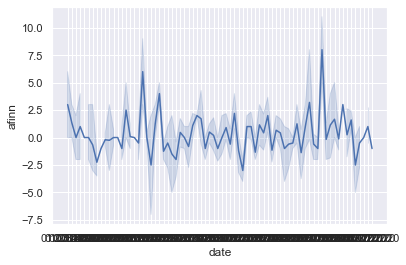

In [98]:
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt 

ax = sns.lineplot(x="date", y="afinn", data=mette_df) # use seaborn to just look at the data

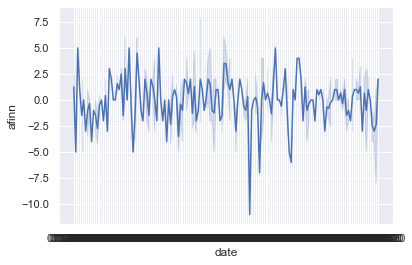

In [100]:
ax = sns.lineplot(x="date", y="afinn", data=soren_df)  # use seaborn to just look at the data

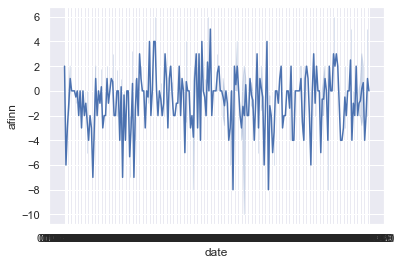

In [103]:
ax = sns.lineplot(x="date", y="afinn", data=kaare_df)  # use seaborn to just look at the data

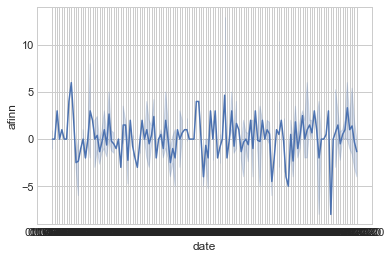

In [116]:
ax = sns.lineplot(x="date", y="afinn", data=magnus_df)  # use seaborn to just look at the data

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

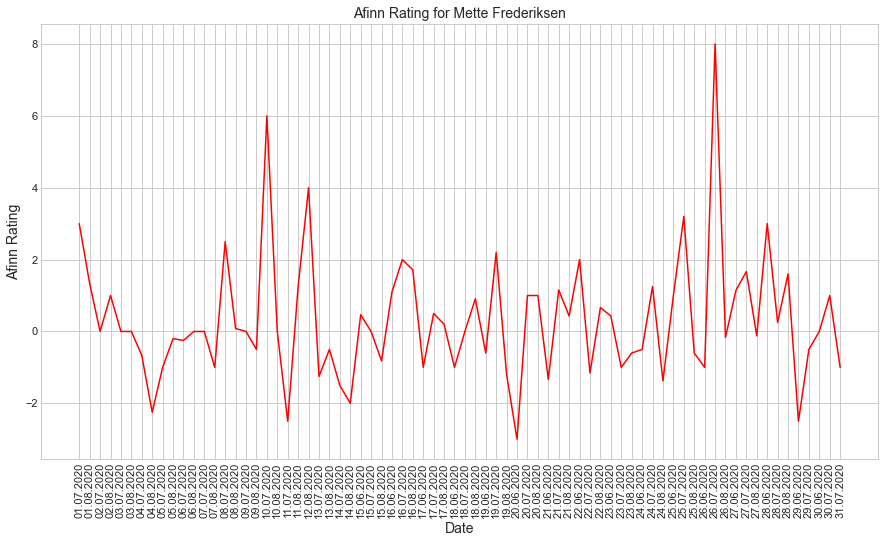

<Figure size 432x288 with 0 Axes>

In [137]:
fig = plt.figure(figsize = (15,8)) # make the figures for each person 
ax = fig.add_subplot(1,1,1)
ax.plot(mette_df.groupby(['date'])['afinn'].mean(), color = 'red')
plt.title('Afinn Rating​ for Mette Frederiksen', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Afinn Rating', fontsize=14)
plt.grid(True)
ax.grid(True)
plt.show()

plt.savefig('mette.png')

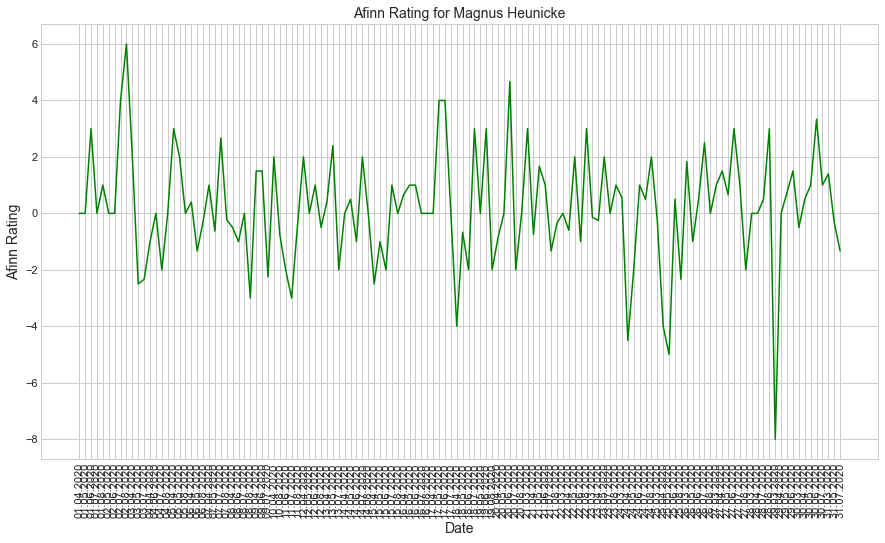

<Figure size 432x288 with 0 Axes>

In [142]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)

ax.plot(magnus_df.groupby(['date'])['afinn'].mean(), color = 'red')
plt.title('Afinn Rating for Magnus Heunicke', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Afinn Rating', fontsize=14)
plt.grid(True)
ax.grid(True)
plt.show()

plt.savefig('magnus.png')

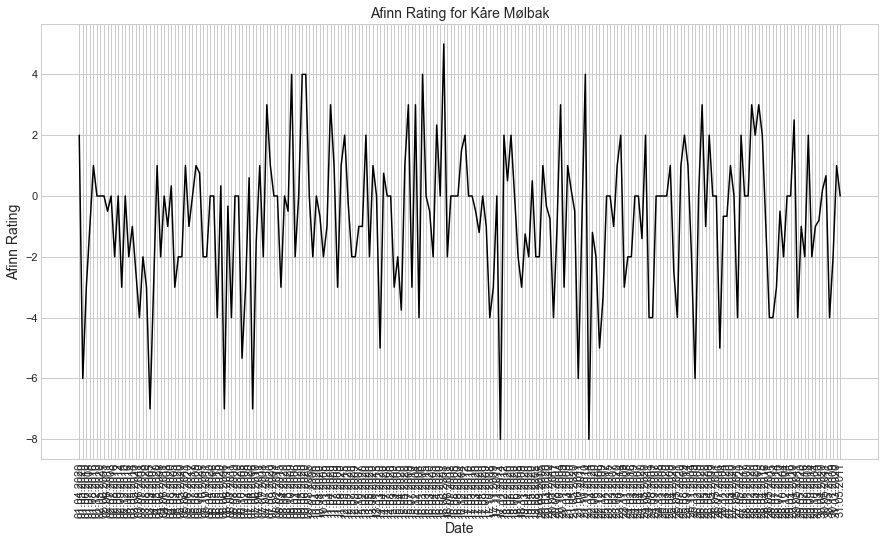

<Figure size 432x288 with 0 Axes>

In [143]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(kaare_df.groupby(['date'])['afinn'].mean(), color = 'black')
plt.title('Afinn Rating for Kåre Mølbak', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Afinn Rating', fontsize=14)
plt.grid(True)
ax.grid(True)

plt.show()
plt.savefig('kaare.png')

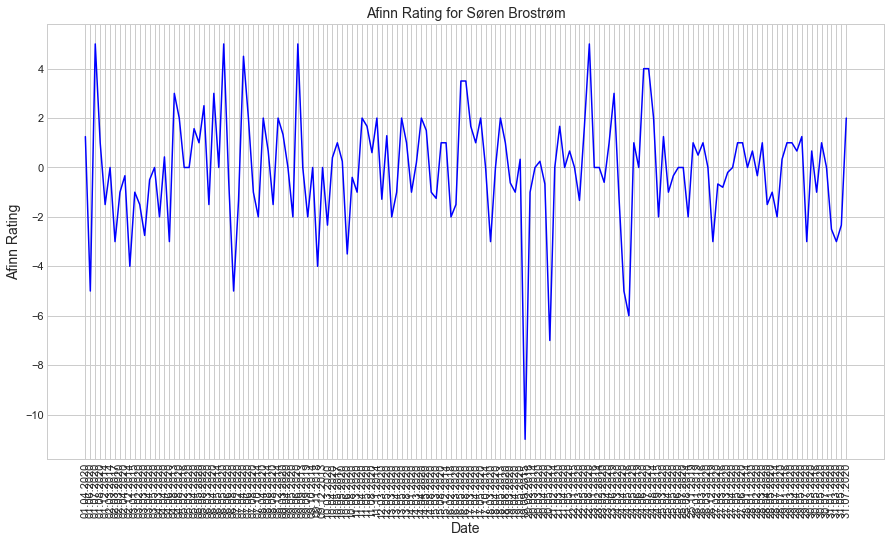

<Figure size 432x288 with 0 Axes>

In [145]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(soren_df.groupby(['date'])['afinn'].mean(), color = 'blue')
plt.title('Afinn Rating for Søren Brostrøm', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Afinn Rating', fontsize=14)
plt.grid(True)
ax.grid(True)
plt.show()
plt.savefig('soren.png')